### SiC MOSFET - C2M0040120D
#### Ouliers Analysis and Removal using KDE and Box plots Visualisation 

- KDE plots
- Boxplots
- IQR-based outlier counts per column
(Optional exploring -Apply KMeans clustering, PCA)

*And final plotting and Detailed Summary Analysis of IQR-based outlier counts per column*

Loaded: C:\Users\pc\Desktop\THESIS_DISTINCTION_THRISHA_RAJKUMAR\data\merged_data\mosfets_step2_no_zeros\C2M0025120D_no_zeros.csv with 119786 rows

KDE plots:


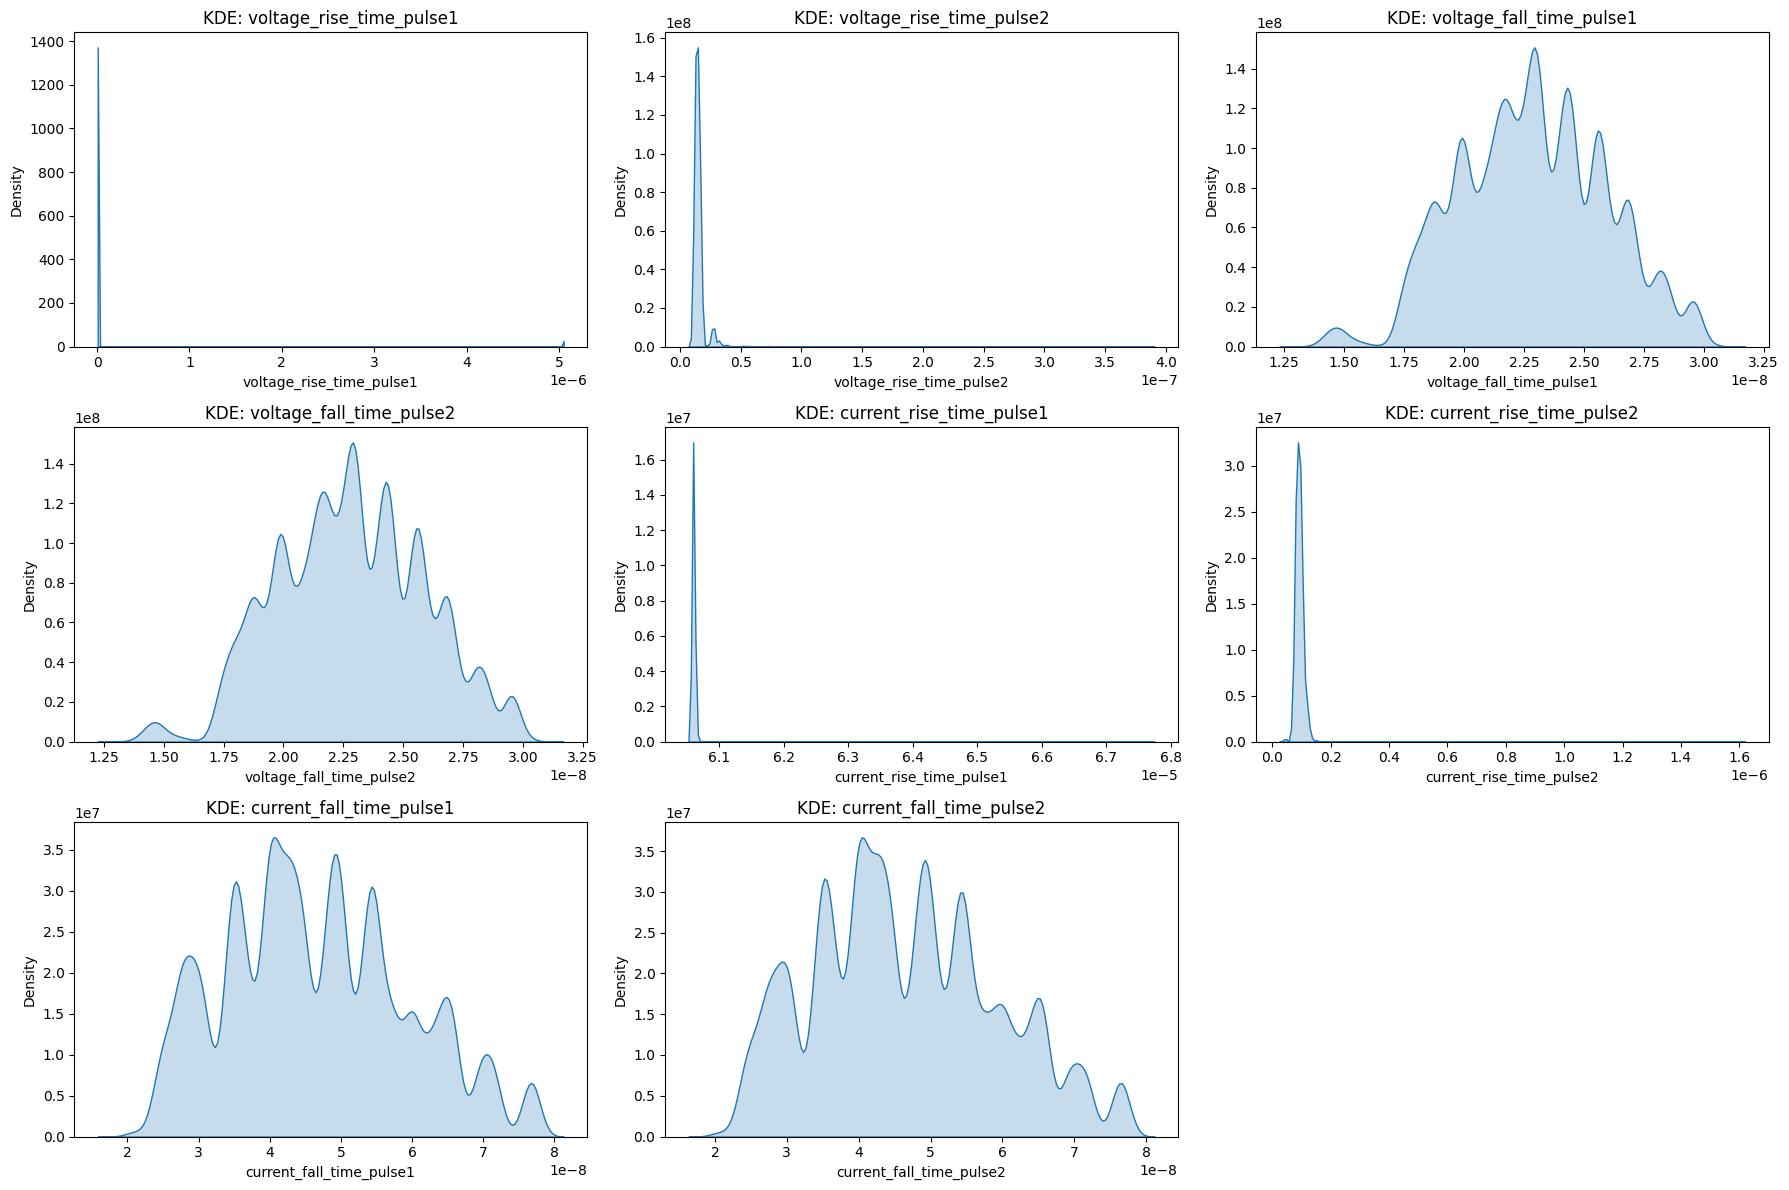

Boxplots:


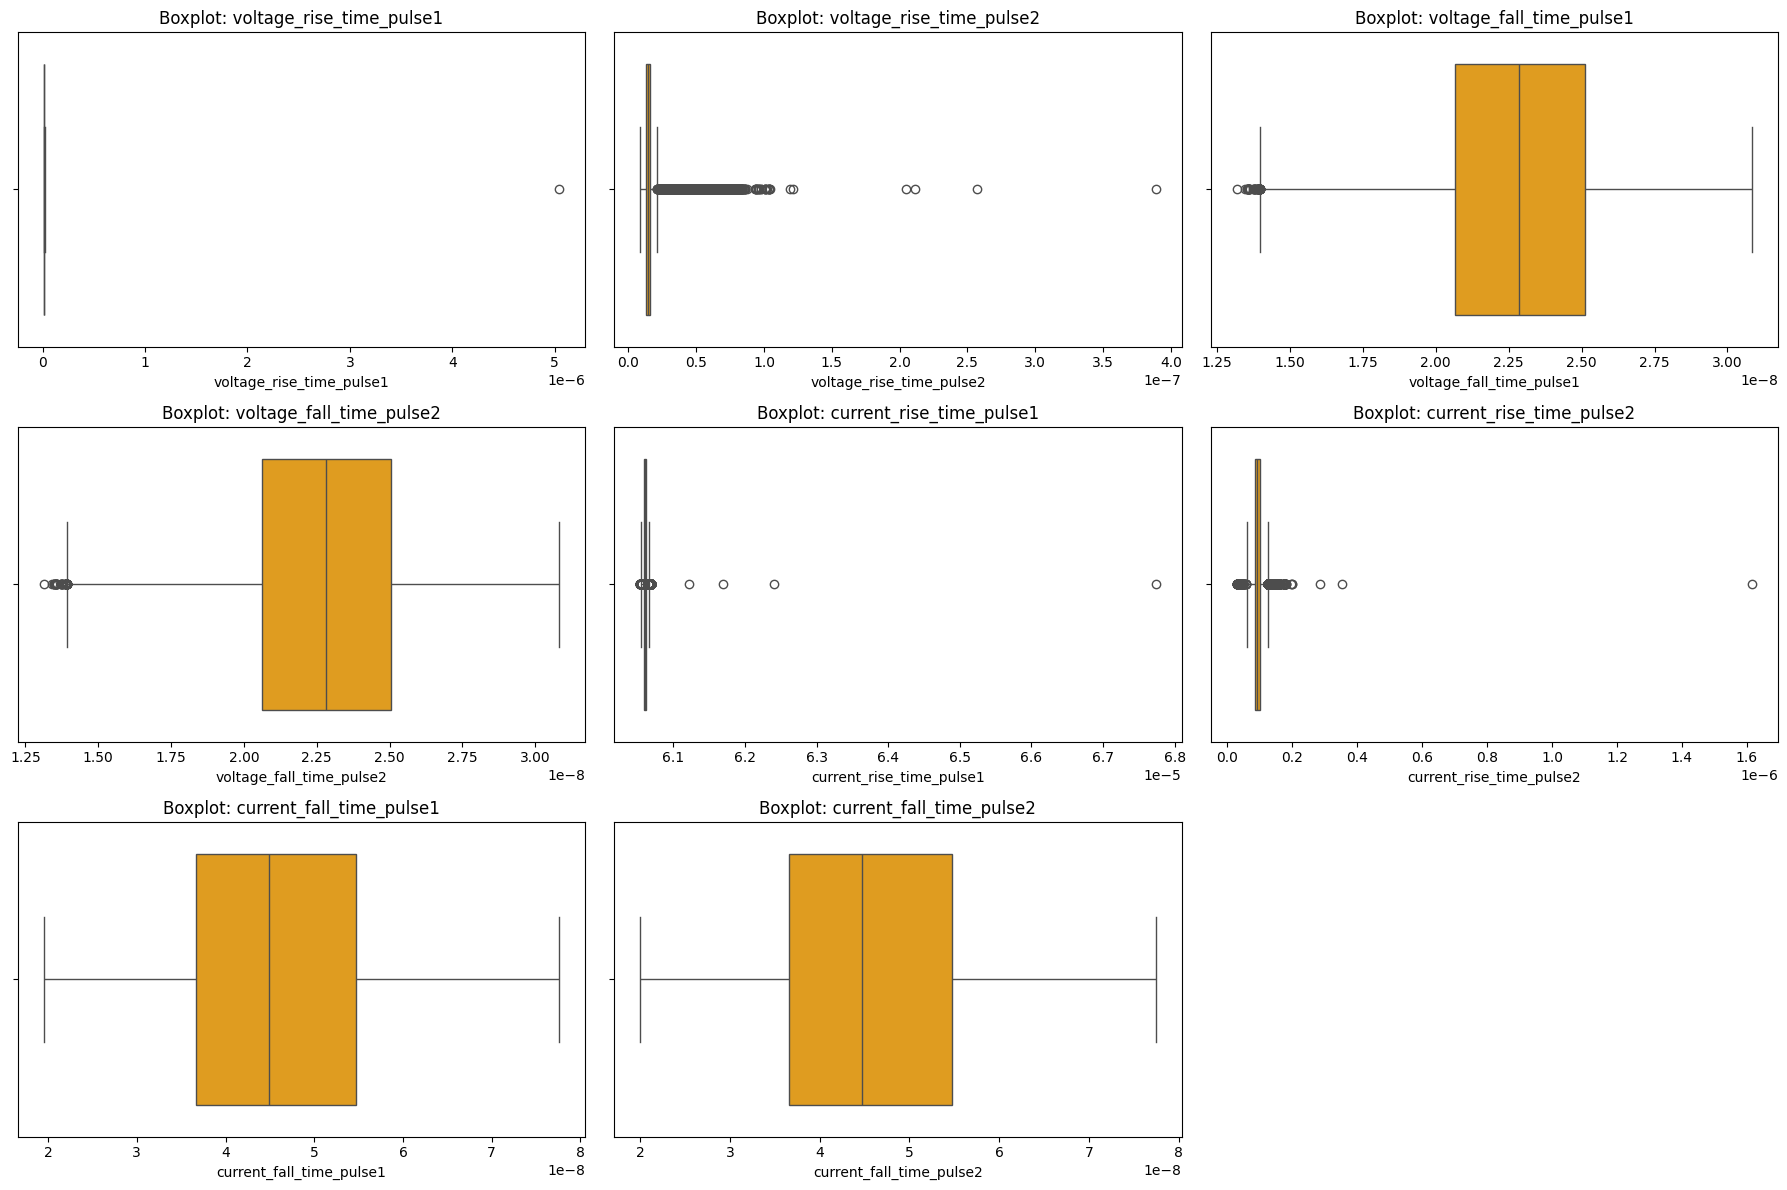

,count,mean,std,min,25%,50%,75%,max,range
voltage_rise_time_pulse1,119786.0,1.720000e-08,1.470000e-08,1.160000e-08,1.560000e-08,1.710000e-08,1.870000e-08,5.044900e-06,5.033400e-06
voltage_rise_time_pulse2,119786.0,1.530000e-08,5.800000e-09,8.700000e-09,1.280000e-08,1.430000e-08,1.600000e-08,3.889000e-07,3.802000e-07
voltage_fall_time_pulse1,119786.0,2.280000e-08,3.100000e-09,1.320000e-08,2.070000e-08,2.290000e-08,2.510000e-08,3.080000e-08,1.770000e-08
voltage_fall_time_pulse2,119786.0,2.280000e-08,3.100000e-09,1.310000e-08,2.060000e-08,2.280000e-08,2.510000e-08,3.080000e-08,1.770000e-08
current_rise_time_pulse1,119786.0,6.060450e-05,3.120000e-08,6.053590e-05,6.058930e-05,6.060480e-05,6.061860e-05,6.773690e-05,7.201000e-06
current_rise_time_pulse2,119786.0,9.320000e-08,1.410000e-08,2.840000e-08,8.420000e-08,9.210000e-08,1.008000e-07,1.616300e-06,1.587900e-06
current_fall_time_pulse1,119786.0,4.650000e-08,1.270000e-08,1.950000e-08,3.660000e-08,4.500000e-08,5.470000e-08,7.760000e-08,5.810000e-08
current_fall_time_pulse2,119786.0,4.650000e-08,1.270000e-08,2.000000e-08,3.660000e-08,4.480000e-08,5.470000e-08,7.750000e-08,5.750000e-08


IQR-based outlier counts per column:

voltage_rise_time_pulse1: 1 outliers
voltage_rise_time_pulse2: 7689 outliers
voltage_fall_time_pulse1: 50 outliers
voltage_fall_time_pulse2: 50 outliers
current_rise_time_pulse1: 1185 outliers
current_rise_time_pulse2: 2388 outliers
current_fall_time_pulse1: 0 outliers
current_fall_time_pulse2: 0 outliers


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# C2M0040120D SiC MOSFET now loaded 
FILE_PATH = r"C:\Users\pc\Desktop\THESIS_DISTINCTION_THRISHA_RAJKUMAR\data\merged_data\mosfets_step2_no_zeros\C2M0025120D_no_zeros.csv"  
df = pd.read_csv(FILE_PATH)

# The time columns from the output or target 
time_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]
# Just a quick display to check the right file and the rows 
print(f"Loaded: {FILE_PATH} with {len(df)} rows\n")

## KDE plotting for understanding the distribution and outliers
print("KDE plots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Box Plots for the ouliers
print("Boxplots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Adding the range and min and max to check 
describe_df = df[time_columns].describe().T
describe_df["range"] = describe_df["max"] - describe_df["min"]
display(describe_df.round(10))

# VERY IMPOTANT FOR UNDERSTANDING THE DISTRIBUTION
print("IQR-based outlier counts per column:\n")
for col in time_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Removed 7 outliers : (119785, 50)


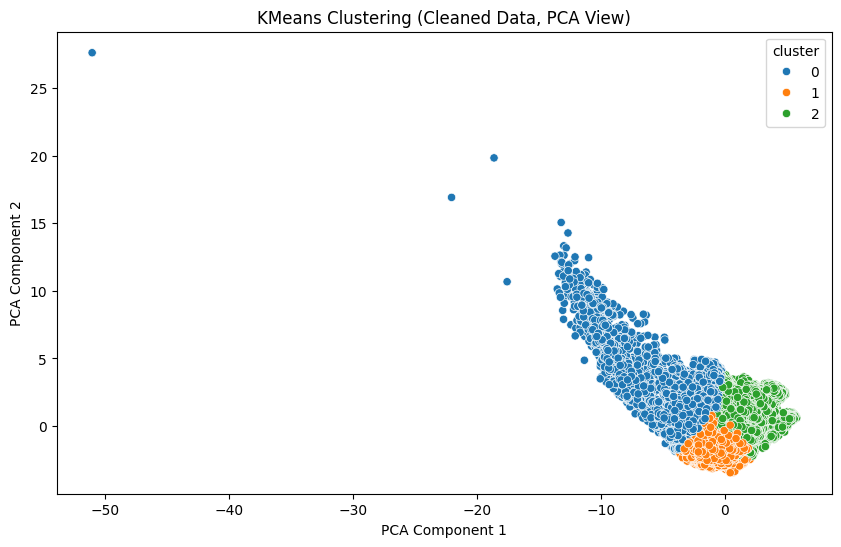


EMI Mean per Cluster:
         overshoot_pulse_1  overshoot_pulse_2  undershoot_pulse_1  \
cluster                                                             
0                  77.0095            78.7069            -40.3277   
1                  55.1775            52.1120            -30.5507   
2                  54.2172            41.9370            -28.7012   

         undershoot_pulse_2  ringing_frequency_MHz  
cluster                                             
0                  -41.2163                46.1186  
1                  -31.3275                43.3944  
2                  -28.8161                45.6806  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Again the times columns 
time_cols = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]
# The EMI - overshoot undershoot and the rining frquency solumns to compare
emi_cols = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]

# Again IQR based outlier
Q1 = df['voltage_rise_time_pulse1'].quantile(0.25)
Q3 = df['voltage_rise_time_pulse1'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Removing the 7 ouliersf rom the voltage rise time pulse1
df_cleaned = df[(df['voltage_rise_time_pulse1'] >= lower) & (df['voltage_rise_time_pulse1'] <= upper)]
print(f"Removed 7 outliers : {df_cleaned.shape}")

# Preparing the data for clustering
features_for_clustering = time_cols + emi_cols
data = df_cleaned[features_for_clustering].dropna()

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3 clusters with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['cluster'] = clusters
# PCA Visualisations
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("KMeans Clustering (Cleaned Data, PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

print("\nEMI Mean per Cluster:")
print(data.groupby("cluster")[emi_cols].mean().round(4))


In [4]:

time_cols = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]

print(f"Dataset: {FILE_PATH} — {len(df)} rows\n")
print("IQR-based outlier counts per column:\n")

for col in time_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_mask = (df[col] < lower) | (df[col] > upper)
    outlier_count = outlier_mask.sum()
    print(f"{col}: {outlier_count} outliers")


Dataset: C:\Users\pc\Desktop\THESIS_DISTINCTION_THRISHA_RAJKUMAR\data\merged_data\mosfets_step2_no_zeros\C2M0025120D_no_zeros.csv — 119786 rows

IQR-based outlier counts per column:

voltage_rise_time_pulse1: 1 outliers
voltage_rise_time_pulse2: 7689 outliers
voltage_fall_time_pulse1: 50 outliers
voltage_fall_time_pulse2: 50 outliers
current_rise_time_pulse1: 1185 outliers
current_rise_time_pulse2: 2388 outliers
current_fall_time_pulse1: 0 outliers
current_fall_time_pulse2: 0 outliers



voltage_fall_time_pulse1: Found 50 outliers


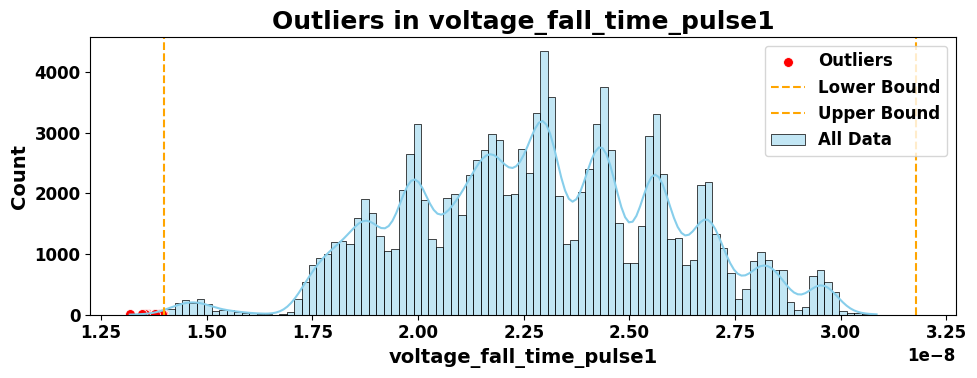


voltage_fall_time_pulse2: Found 50 outliers


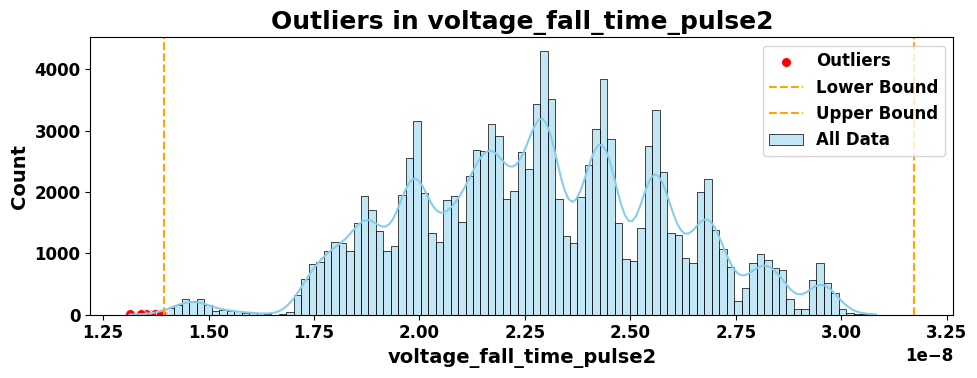

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Update matplotlib defaults for font size and weight
plt.rcParams.update({
    "font.size": 14,       # Base font size
    "font.weight": "bold", # Bold text globally
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

columns_to_plot = ['voltage_fall_time_pulse1', 'voltage_fall_time_pulse2']

for col in columns_to_plot:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filtering the outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\n{col}: Found {len(outliers)} outliers")

    # plotting
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=100, kde=True, color='skyblue', label='All Data')
    sns.scatterplot(x=outliers[col], y=[5]*len(outliers), color='red', label='Outliers', s=50)
    plt.axvline(lower, color='orange', linestyle='--', label='Lower Bound')
    plt.axvline(upper, color='orange', linestyle='--', label='Upper Bound')

    plt.title(f"Outliers in {col}", fontsize=18, fontweight='bold')
    plt.xlabel(col, fontsize=14, fontweight='bold')
    plt.ylabel("Count", fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


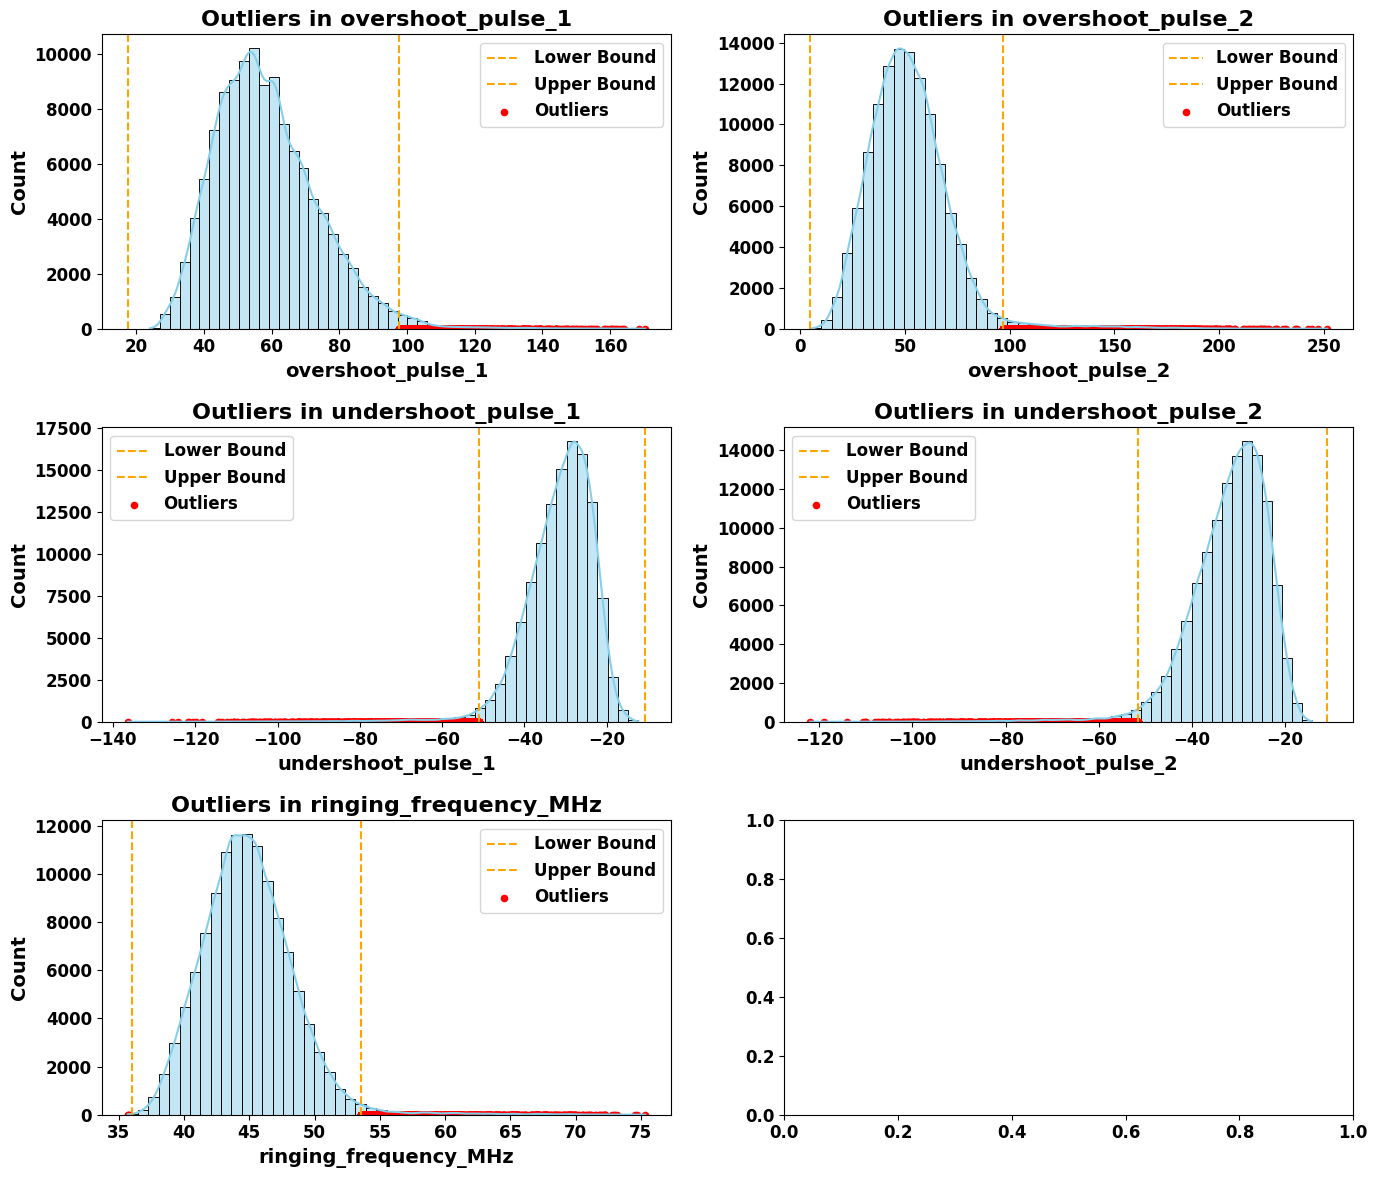

IQR-based Outlier Summary:


,min,max,iqr_lower,iqr_upper,outliers,range
overshoot_pulse_1,24.057129,170.370850,17.526245,97.757690,1746.0,146.313721
overshoot_pulse_2,5.319580,251.565186,4.770782,96.663116,2619.0,246.245605
undershoot_pulse_1,-136.393005,-12.376389,-50.929290,-10.644095,2194.0,124.016617
undershoot_pulse_2,-121.995514,-14.246931,-51.547527,-10.941845,2340.0,107.748583
ringing_frequency_MHz,35.686539,75.345309,36.001533,53.547512,1622.0,39.658770


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Global font settings
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.grid": False  # turn off grid globally
})

df_filtered = df_cleaned.copy()
target_columns = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]
outlier_stats = {}

n_cols = 2
n_rows = (len(target_columns) + 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(target_columns):
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_filtered[(df_filtered[col] < lower) | (df_filtered[col] > upper)]
    outlier_stats[col] = {
        'min': df_filtered[col].min(),
        'max': df_filtered[col].max(),
        'iqr_lower': lower,
        'iqr_upper': upper,
        'outliers': len(outliers)
    }

    # Plot histogram with KDE
    sns.histplot(df_filtered[col], bins=50, kde=True, ax=axs[i], color='skyblue')

    # Add bounds
    axs[i].axvline(lower, color='orange', linestyle='--', label='Lower Bound')
    axs[i].axvline(upper, color='orange', linestyle='--', label='Upper Bound')

    # Outliers
    axs[i].scatter(outliers[col], [0]*len(outliers), color='red', s=20, label='Outliers')

    # Titles and labels
    axs[i].set_title(f"Outliers in {col}", fontsize=16, fontweight="bold")
    axs[i].set_xlabel(col, fontsize=14, fontweight="bold")
    axs[i].set_ylabel("Count", fontsize=14, fontweight="bold")
    axs[i].legend()
    axs[i].grid(False)  # remove grid from each subplot explicitly

# Adjust layout
plt.tight_layout()
plt.show()

# Summary DataFrame
summary_df = pd.DataFrame(outlier_stats).T
summary_df['range'] = summary_df['max'] - summary_df['min']
print("IQR-based Outlier Summary:")
display(summary_df)


FINAL PLOTTING 

 Null Value Count Per Target Column:
Series([], dtype: int64)

 Negative Value Count (Rise/Fall Columns Only):
Series([], dtype: int64)

 Final IQR-based Outlier Summary:


,min,max,iqr_lower,iqr_upper,outliers,range
overshoot_pulse_1,3.395557e+01,1.032046e+03,2.718900e+01,9.641483e+01,9406.0,9.980908e+02
overshoot_pulse_2,1.157056e+01,2.332334e+02,8.863831e+00,1.037608e+02,13126.0,2.216628e+02
undershoot_pulse_1,-1.207334e+02,-1.589072e+01,-5.842465e+01,-8.391932e+00,14989.0,1.048427e+02
undershoot_pulse_2,-1.235725e+02,-1.597514e+01,-5.862875e+01,-8.460138e+00,14376.0,1.075974e+02
ringing_frequency_MHz,4.079650e+01,9.178611e+01,4.146156e+01,6.182213e+01,10722.0,5.098961e+01
voltage_rise_time_pulse1,1.030000e-08,1.990000e-08,9.250000e-09,2.085000e-08,0.0,9.600000e-09
voltage_rise_time_pulse2,7.360000e-09,1.310000e-07,6.400000e-09,1.840000e-08,39414.0,1.236400e-07
voltage_fall_time_pulse1,1.120000e-08,2.580000e-08,1.230000e-08,2.590000e-08,324.0,1.460000e-08
voltage_fall_time_pulse2,1.110000e-08,2.590000e-08,1.230000e-08,2.590000e-08,319.0,1.480000e-08
current_rise_time_pulse1,6.050000e-05,6.070000e-05,6.060000e-05,6.060000e-05,7586.0,2.000000e-07


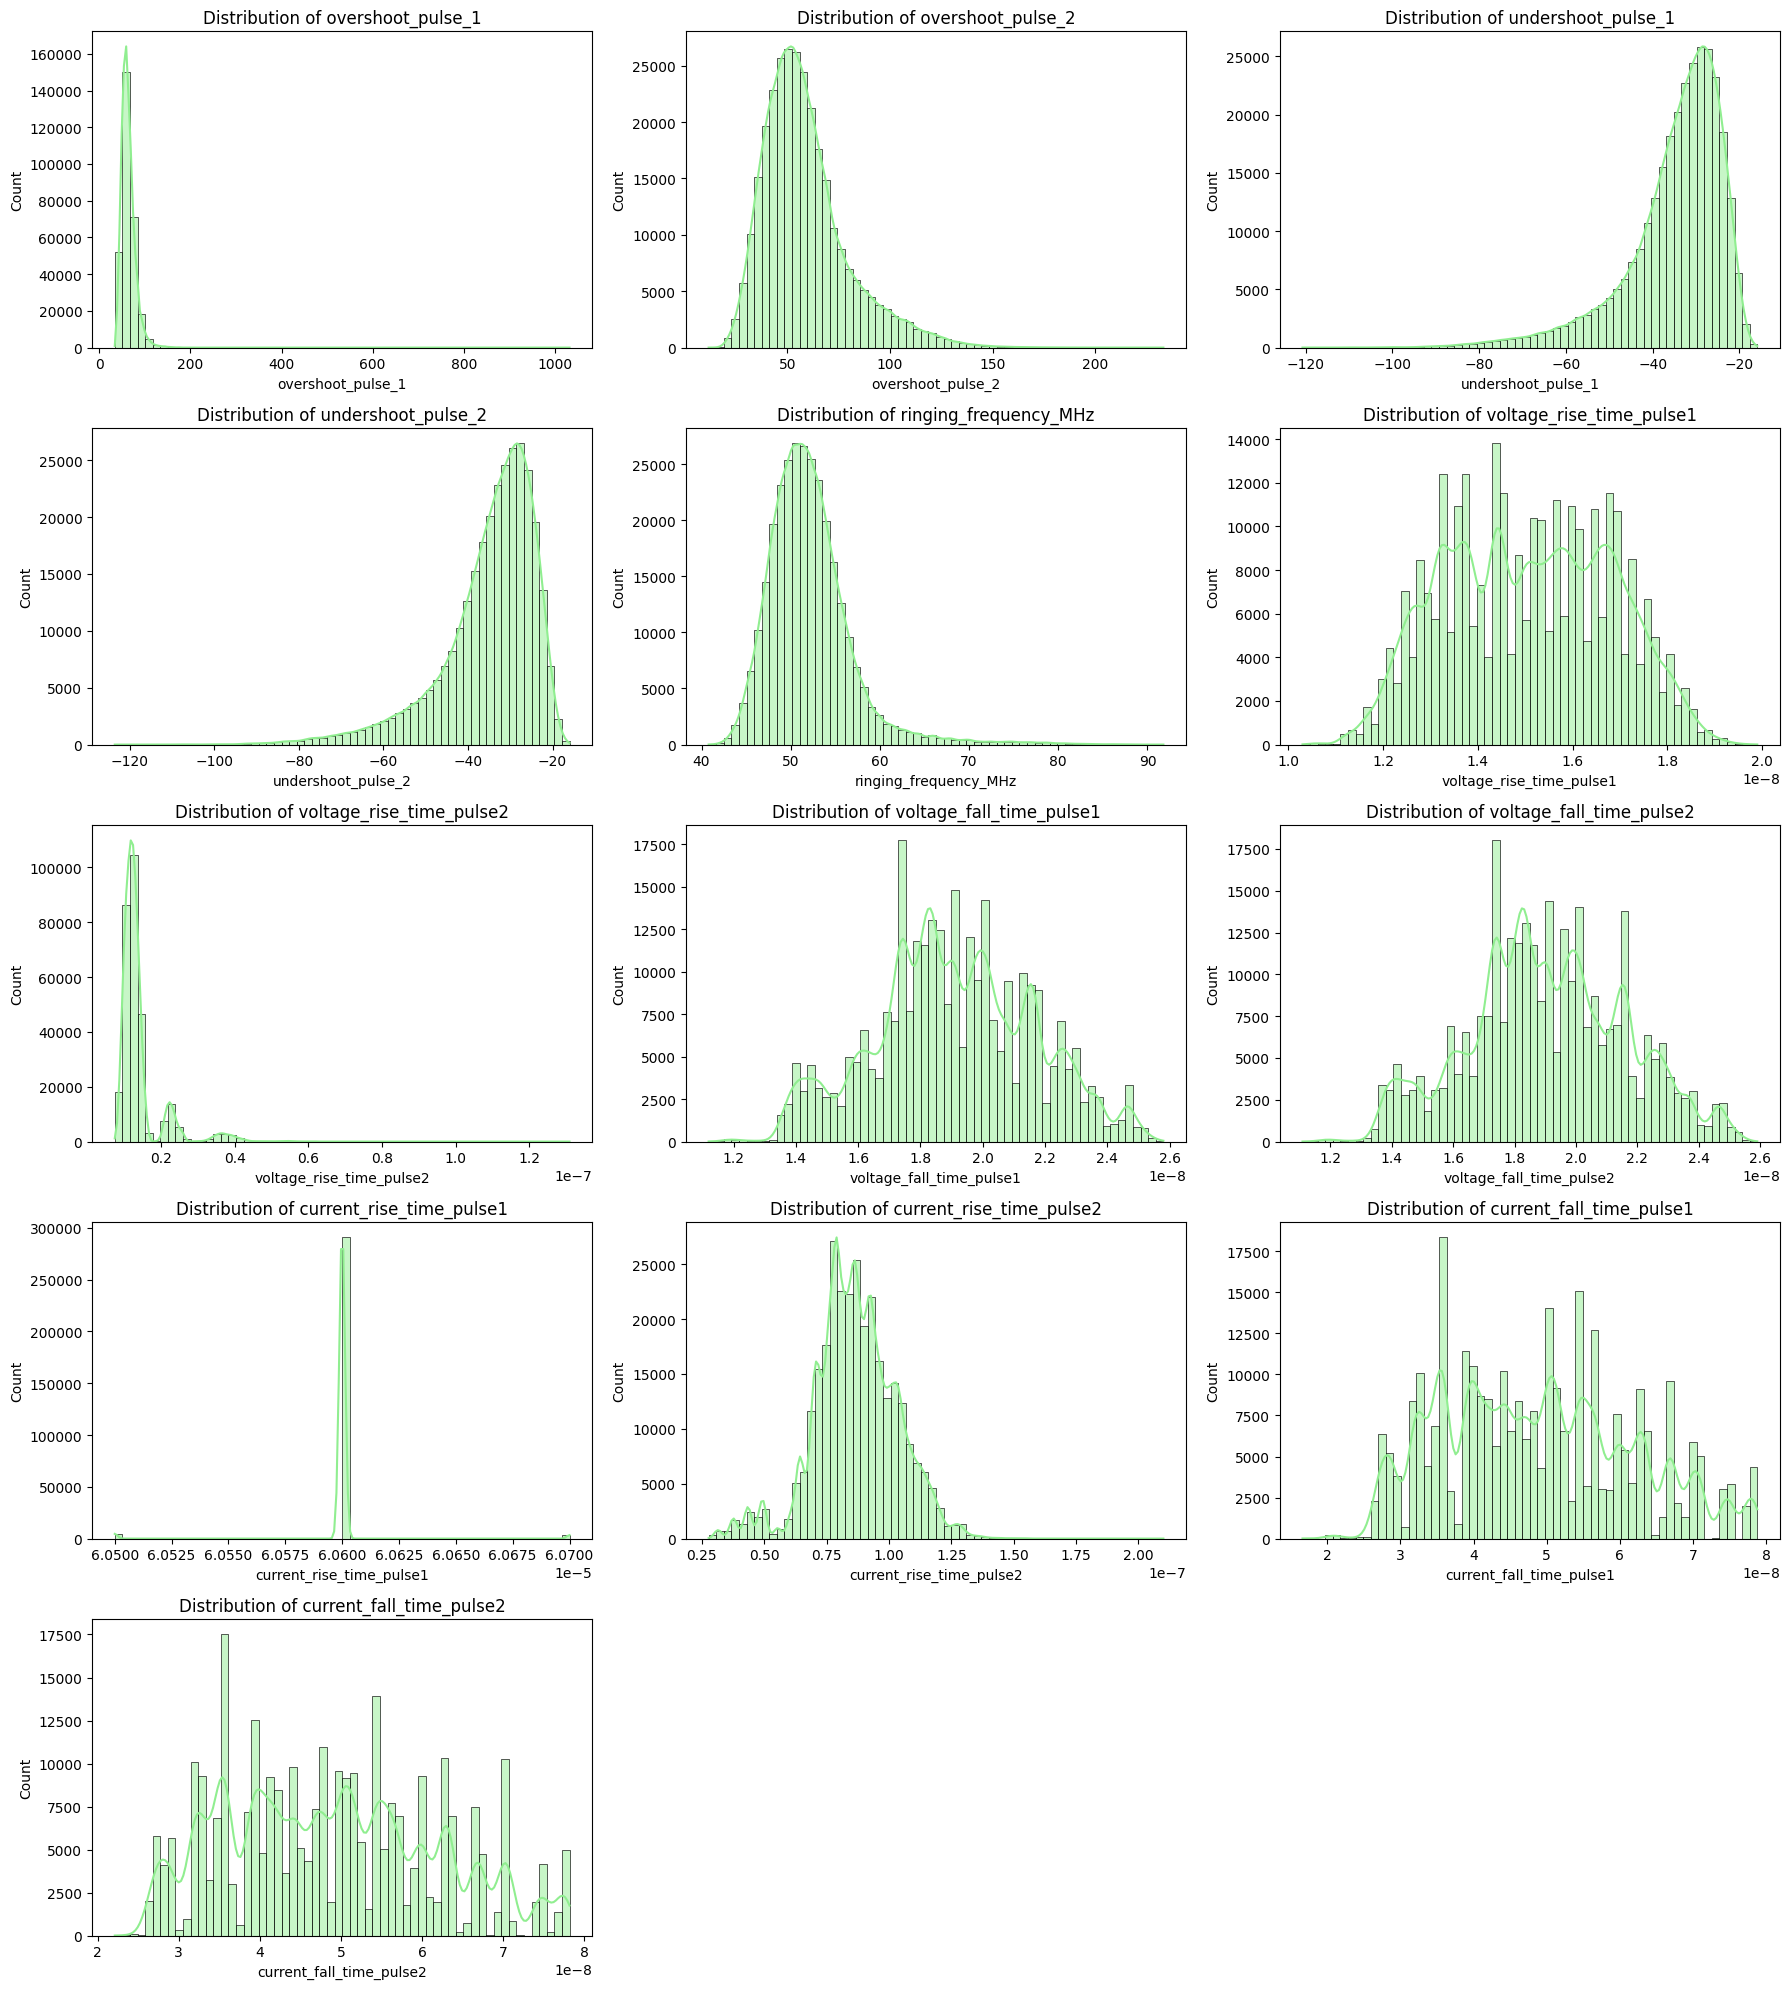

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_columns = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz',
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]

# Checking for the null values 
null_counts = df_filtered[target_columns].isnull().sum()
print(" Null Value Count Per Target Column:")
print(null_counts[null_counts > 0])

#  for negative values — only rise/fall should NOT be negative
rise_fall_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]

check_negative = df_filtered[rise_fall_columns].lt(0)
negative_counts = check_negative.sum()
print("\n Negative Value Count (Rise/Fall Columns Only):")
print(negative_counts[negative_counts > 0])  

# Final Summary 
outlier_stats = {}
for col in target_columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower) | (df_filtered[col] > upper)]
    
    outlier_stats[col] = {
        'min': df_filtered[col].min(),
        'max': df_filtered[col].max(),
        'iqr_lower': lower,
        'iqr_upper': upper,
        'outliers': len(outliers),
        'range': df_filtered[col].max() - df_filtered[col].min()
    }

summary_df = pd.DataFrame(outlier_stats).T
print("\n Final IQR-based Outlier Summary:")
display(summary_df)

# Final plotting for the EMI output distributions
n_cols = 3
n_rows = (len(target_columns) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(target_columns):
    sns.histplot(df_filtered[col], bins=60, kde=True, ax=axs[i], color='lightgreen')
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")

for j in range(len(target_columns), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [11]:
df_filtered.to_csv('mosfets_step3_final_cleaned/C2M0040120D_cleaned.csv', index=False)
print("aved to: mosfets_step3_final_cleaned/C2M0040120D_cleaned.csv")


aved to: mosfets_step3_final_cleaned/C2M0040120D_cleaned.csv
